In [2]:
# Question 1


# Importation des librairies
import pandas as pd
import numpy as np

# Lecture des données
df = pd.read_csv('Tetuan-PC.csv')

# Obtenir les dimensions du DataFrame
n_observations, n_variables = df.shape

print(f"Nombre d'observations : {n_observations}")
print(f"Nombre de variables : {n_variables}")

Nombre d'observations : 13248
Nombre de variables : 9



Statistiques descriptives :
        Temperature      Humidity     WindSpeed  GenDiffFlows     DiffFlows  \
count  13248.000000  13248.000000  13248.000000  13248.000000  13248.000000   
mean      25.353431     63.239117      4.000284    254.436238     68.161448   
std        3.687087     18.150509      1.857605    310.646997     91.721217   
min       13.990000     11.340000      0.050000      0.018000      0.019000   
25%       22.750000     50.260000      4.904000      0.088000      0.122000   
50%       25.140000     65.050000      4.910000     61.540000     35.030000   
75%       27.430000     78.300000      4.919000    526.100000    100.200000   
max       40.010000     93.800000      4.998000    978.000000    558.700000   

            PCZone1       PCZone2       PCZone3  
count  13248.000000  13248.000000  13248.000000  
mean   35272.400777  22976.430993  23544.040816  
std     7073.784592   5239.586748   7667.598488  
min    18283.684790  10624.116420   8189.908069  
25%    29

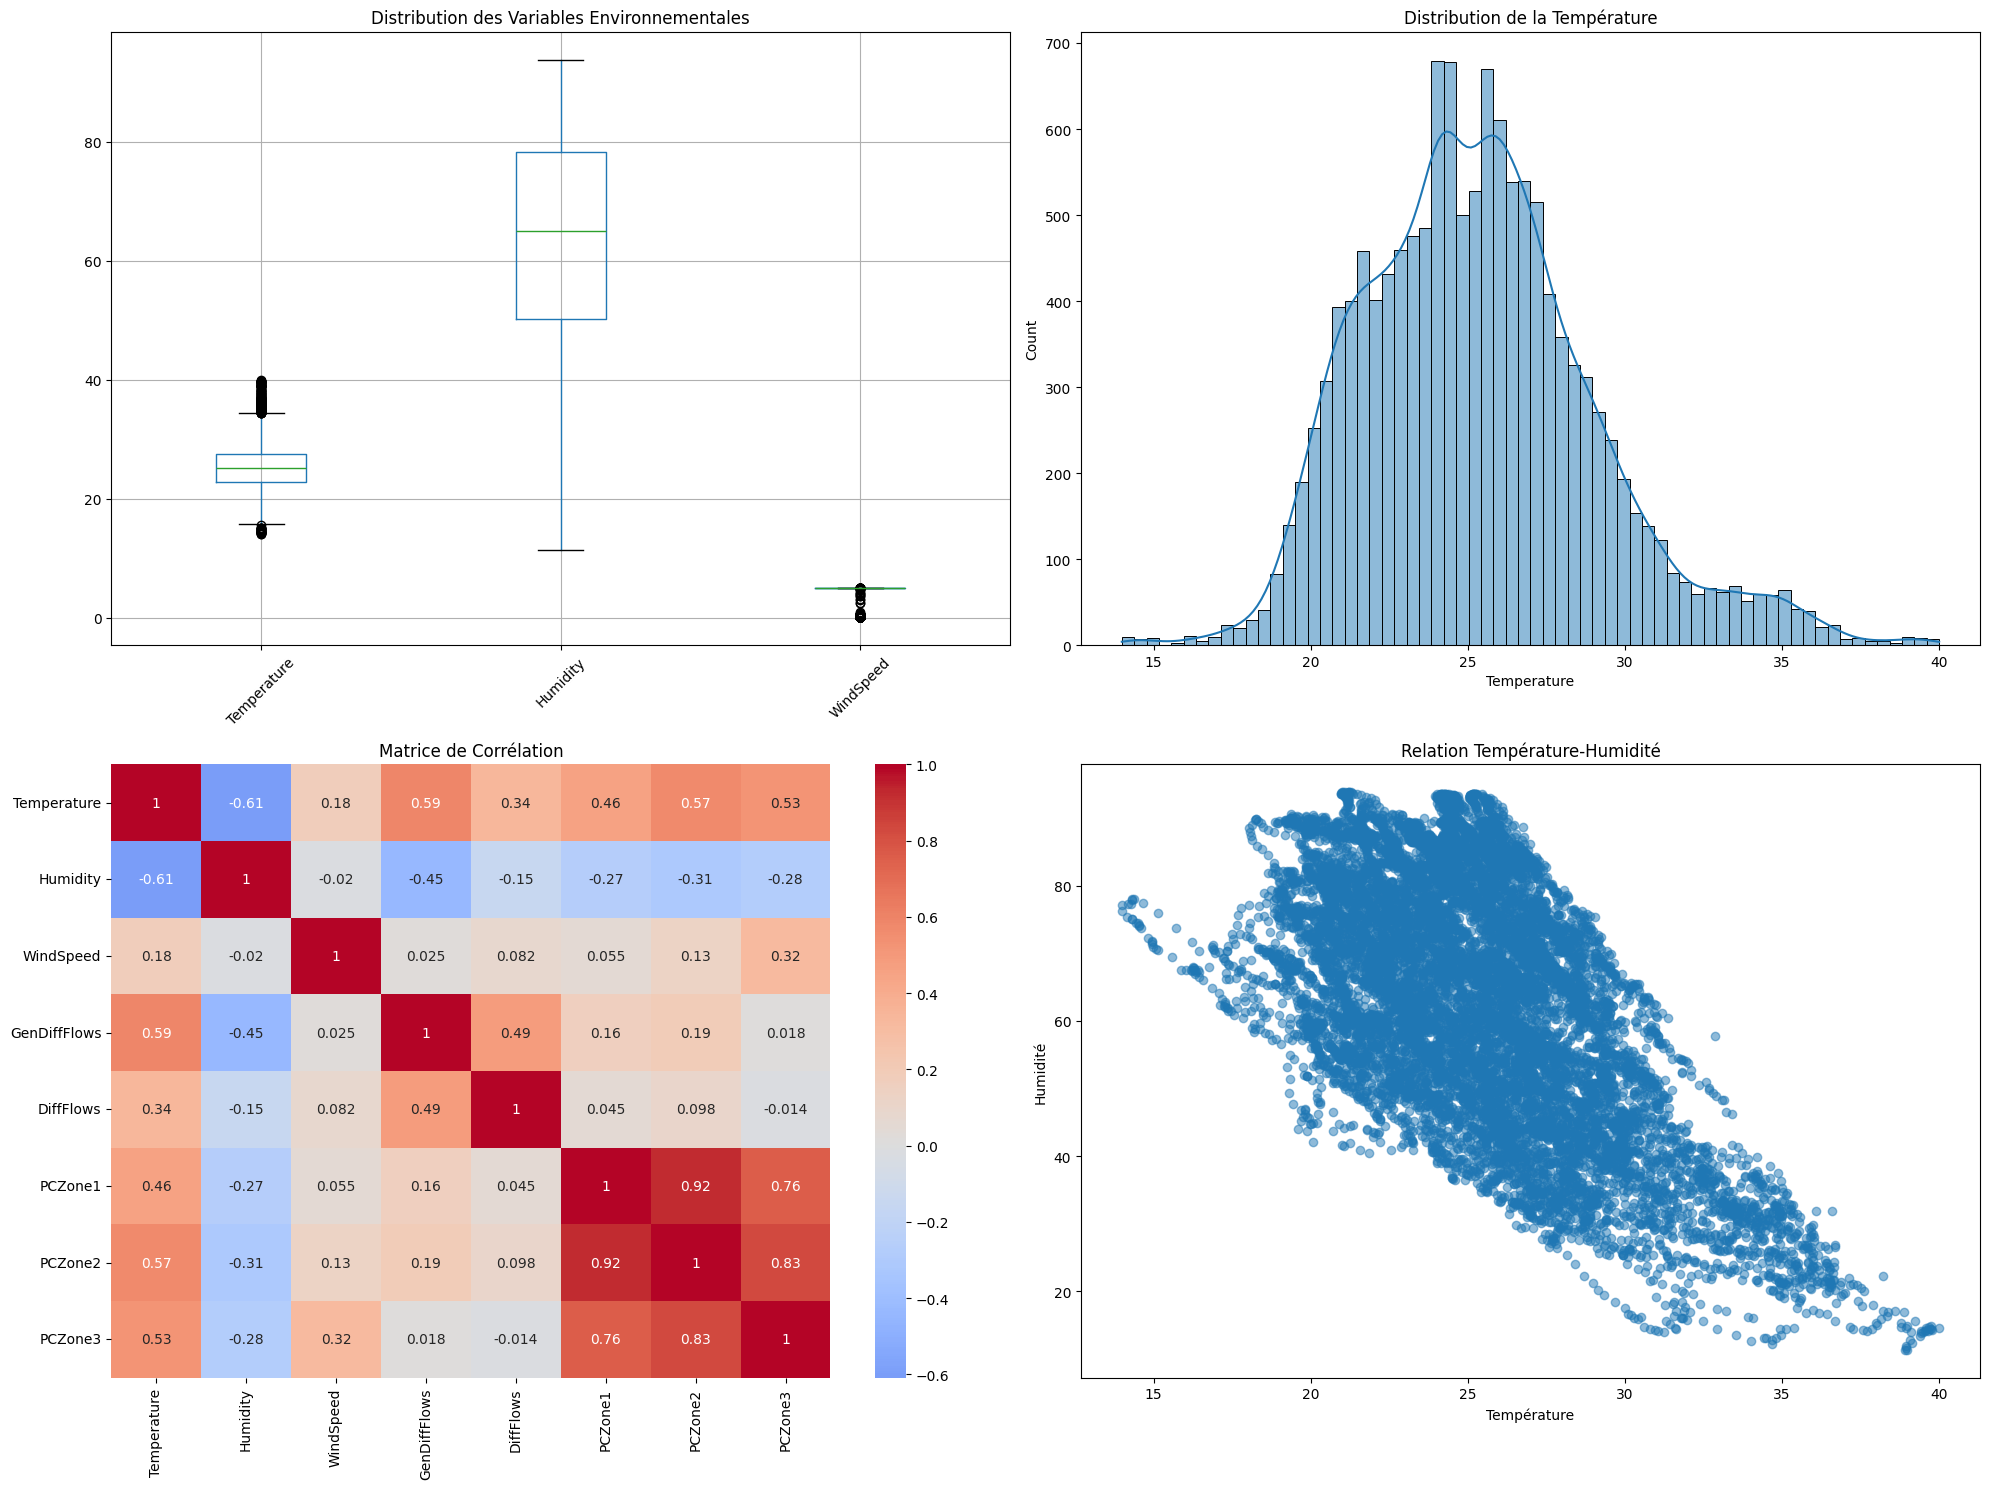

In [9]:
#Question 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Lecture des données
df = pd.read_csv('Tetuan-PC.csv')

# Statistiques descriptives pour toutes les variables numériques
stats_desc = df.describe()
print("\nStatistiques descriptives :")
print(stats_desc)

# Création d'une figure avec plusieurs sous-graphiques
plt.figure(figsize=(20, 15))

# 1. Boxplots pour toutes les variables numériques
plt.subplot(2, 2, 1)
df.boxplot(column=['Temperature', 'Humidity', 'WindSpeed'])
plt.title('Distribution des Variables Environnementales')
plt.xticks(rotation=45)

# 2. Distribution de la température
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='Temperature', kde=True)
plt.title('Distribution de la Température')

# 3. Heatmap des corrélations
plt.subplot(2, 2, 3)
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de Corrélation')

# 4. Scatter plot Température vs Humidité
plt.subplot(2, 2, 4)
plt.scatter(df['Temperature'], df['Humidity'], alpha=0.5)
plt.xlabel('Température')
plt.ylabel('Humidité')
plt.title('Relation Température-Humidité')

plt.tight_layout()

# Calcul des statistiques supplémentaires
for column in ['Temperature', 'Humidity', 'WindSpeed', 'GenDiffFlows', 'DiffFlows', 'PCZone1', 'PCZone2', 'PCZone3']:
    skewness = stats.skew(df[column])
    kurtosis = stats.kurtosis(df[column])
    print(f"\nStatistiques pour {column}:")
    print(f"Asymétrie (Skewness): {skewness:.2f}")
    print(f"Aplatissement (Kurtosis): {kurtosis:.2f}")

# Tests de normalité
for column in ['Temperature', 'Humidity', 'WindSpeed']:
    stat, p_value = stats.normaltest(df[column])
    print(f"\nTest de normalité pour {column}:")
    print(f"p-value: {p_value:.2e}")

plt.show()